In [1]:
import pandas as pd
import os

# Aktif dizini ve dosyaları yazdır
print("Aktif dizin:", os.getcwd())
print("Dizindeki dosyalar:", os.listdir())

# Dataset klasörünü kontrol et
print("dataset klasörü içeriği:", os.listdir("dataset"))

# CSV dosyasını oku
df = pd.read_csv("dataset/Sample-Superstore.csv")

# İlk 5 satırı göster
df.head()




Aktif dizin: c:\Users\havva\eda-superstore-analysis
Dizindeki dosyalar: ['.git', '.ipynb_checkpoints', 'analysis.ipynb', 'dataset']
dataset klasörü içeriği: ['Sample-Superstore.csv', 'summary_sales.csv']


,Order ID,Category,Sales,Quantity,Region
0,CA-2017-152156,Furniture,261.96,2,West
1,CA-2017-152157,Office Supplies,14.62,1,East
2,CA-2017-152158,Technology,957.58,5,Central
3,CA-2017-152159,Furniture,22.37,3,West
4,CA-2017-152160,Technology,48.86,7,East


In [4]:
# Satır ve sütun sayısı
print("Satır sayısı:", df.shape[0])
print("Sütun sayısı:", df.shape[1])

# Veri tipi ve eksik değer kontrolü
df.info()

# İlk 5 satırı göster
df.head()


Satır sayısı: 5
Sütun sayısı: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Order ID  5 non-null      object 
 1   Category  5 non-null      object 
 2   Sales     5 non-null      float64
 3   Quantity  5 non-null      int64  
 4   Region    5 non-null      object 
dtypes: float64(1), int64(1), object(3)
memory usage: 332.0+ bytes


,Order ID,Category,Sales,Quantity,Region
0,CA-2017-152156,Furniture,261.96,2,West
1,CA-2017-152157,Office Supplies,14.62,1,East
2,CA-2017-152158,Technology,957.58,5,Central
3,CA-2017-152159,Furniture,22.37,3,West
4,CA-2017-152160,Technology,48.86,7,East


In [5]:
df.describe()


,Sales,Quantity
count,5.000000,5.000000
mean,261.078000,3.600000
std,402.453522,2.408319
min,14.620000,1.000000
25%,22.370000,2.000000
50%,48.860000,3.000000
75%,261.960000,5.000000
max,957.580000,7.000000


In [6]:
for col in ['Category', 'Region']:
    print(f"{col} sütunundaki benzersiz değerler:", df[col].unique())


Category sütunundaki benzersiz değerler: ['Furniture' 'Office Supplies' 'Technology']
Region sütunundaki benzersiz değerler: ['West' 'East' 'Central']


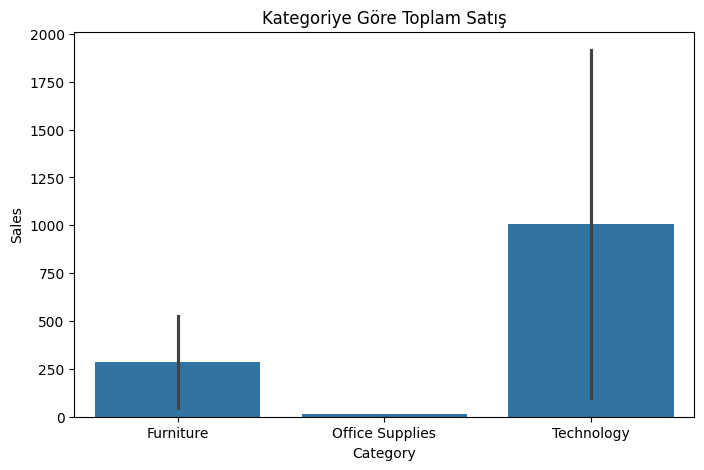

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Category', y='Sales', estimator=sum)
plt.title('Kategoriye Göre Toplam Satış')
plt.show()


In [8]:
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()
orders_by_region = df.groupby('Region')['Order ID'].count().reset_index()

print("Bölgelere göre toplam satış:\n", sales_by_region)
print("\nBölgelere göre sipariş sayısı:\n", orders_by_region)


Bölgelere göre toplam satış:
     Region   Sales
0  Central  957.58
1     East   63.48
2     West  284.33

Bölgelere göre sipariş sayısı:
     Region  Order ID
0  Central         1
1     East         2
2     West         2


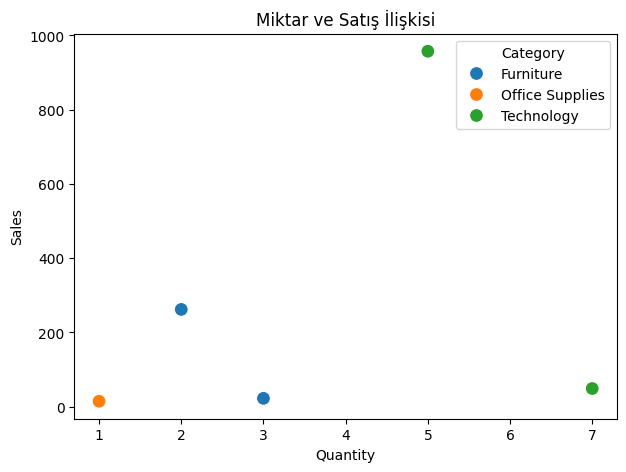

In [9]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Quantity', y='Sales', hue='Category', s=100)
plt.title('Miktar ve Satış İlişkisi')
plt.show()


In [10]:
avg_sales_category = df.groupby('Category')['Sales'].mean().reset_index()
print("Kategori bazında ortalama satış:\n", avg_sales_category)


Kategori bazında ortalama satış:
           Category    Sales
0        Furniture  142.165
1  Office Supplies   14.620
2       Technology  503.220


In [11]:
tech_big_sales = df[(df['Category'] == 'Technology') & (df['Sales'] > 100)]
print(f"100'den fazla satış yapan teknoloji sipariş sayısı: {tech_big_sales.shape[0]}")
tech_big_sales


100'den fazla satış yapan teknoloji sipariş sayısı: 1


,Order ID,Category,Sales,Quantity,Region
2,CA-2017-152158,Technology,957.58,5,Central


In [12]:
pivot = df.pivot_table(values='Sales', index='Category', columns='Region', aggfunc='sum', fill_value=0)
print(pivot)


Region           Central   East    West
Category                               
Furniture           0.00   0.00  284.33
Office Supplies     0.00  14.62    0.00
Technology        957.58  48.86    0.00


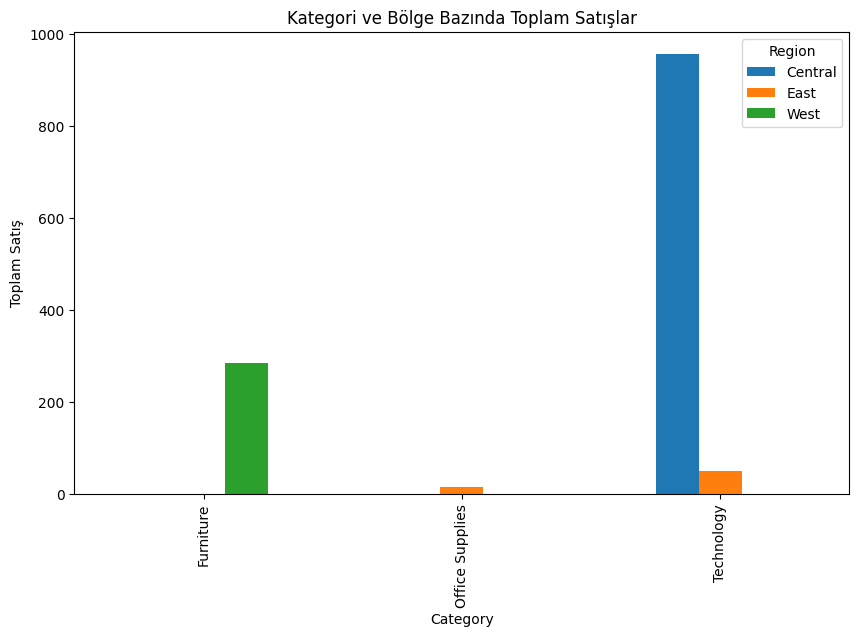

In [13]:
pivot.plot(kind='bar', figsize=(10,6))
plt.title("Kategori ve Bölge Bazında Toplam Satışlar")
plt.ylabel("Toplam Satış")
plt.show()


In [14]:
pivot.to_csv("dataset/summary_sales.csv")


Order ID    0
Category    0
Sales       0
Quantity    0
Region      0
dtype: int64
Order ID     object
Category     object
Sales       float64
Quantity      int64
Region       object
dtype: object
         Order ID         Category   Sales  Quantity   Region    AvgPrice
0  CA-2017-152156        Furniture  261.96         2     West  130.980000
1  CA-2017-152157  Office Supplies   14.62         1     East   14.620000
2  CA-2017-152158       Technology  957.58         5  Central  191.516000
3  CA-2017-152159        Furniture   22.37         3     West    7.456667
4  CA-2017-152160       Technology   48.86         7     East    6.980000


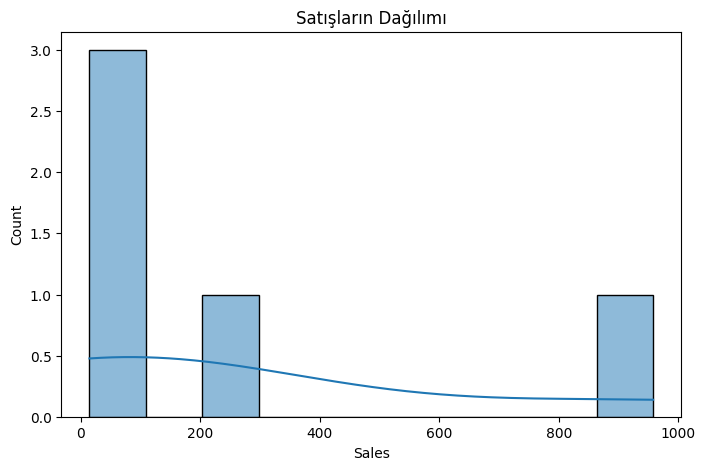

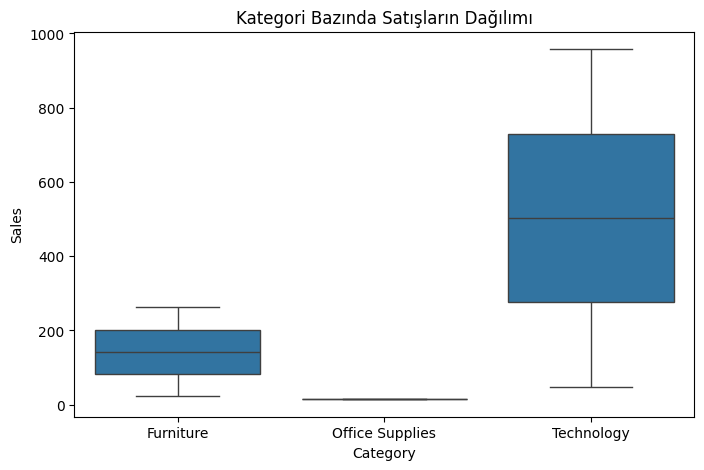

In [15]:
# Eksik veri kontrolü
print(df.isnull().sum())

# Veri tiplerine göz atma
print(df.dtypes)

# Satış başına ortalama fiyat hesaplayalım
df['AvgPrice'] = df['Sales'] / df['Quantity']
print(df.head())

# Satışların dağılımı histogram ile
plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], bins=10, kde=True)
plt.title("Satışların Dağılımı")
plt.show()

# Kategori bazında satışların kutu grafiği (boxplot)
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Category', y='Sales')
plt.title("Kategori Bazında Satışların Dağılımı")
plt.show()


In [16]:
import os
print(os.listdir("dataset"))


['.ipynb_checkpoints', 'Sample-Superstore.csv', 'summary_sales.csv']
